In [1]:
# Objective: To explore the relationship between various medical and demographic factors among patients
#          : To predict lifestyle factors lead to patients developing diabetes

In [2]:
# to import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("C:/Users/miche/Desktop/machine_learning/diabetes_prediction_dataset.csv")

In [5]:
# to display variables in dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# to check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
# Dataset contains 100,000 patients' data
len(df)

100000

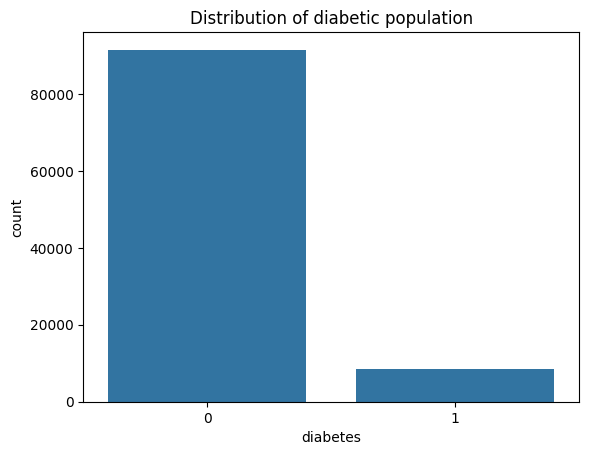

In [8]:
# to see distribution of target variable = 'diabetes'
sns.countplot(data=df, x='diabetes')
plt.title('Distribution of diabetic population');

In [9]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [10]:
# 8.5% of patients have diabetes
pd.DataFrame(100*(df['diabetes'].value_counts())/len(df))

,count
diabetes,
0,91.5
1,8.5


In [11]:
# to check data types of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


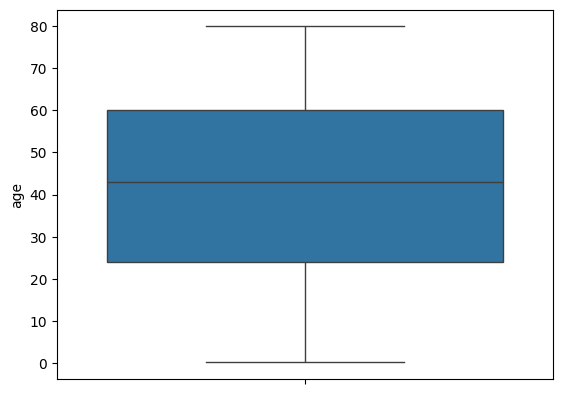

In [12]:
sns.boxplot(data=df, y='age');

In [13]:
# the average age of patient is 40 years
df['age'].describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [14]:
# to split the years into different categories, using def custom function
def age_categories(s):
    if  0 <= s <= 20:
        return "1 to 20 "
    elif 21 <= s <= 39:
        return "21 to 35"
    elif 36 <= s <= 50:
        return "36 to 50"
    elif 51 <= s <= 65:
        return "51 to 65"
    elif 66 <= s:
        return "above 66"

In [15]:
# to .apply() custom function
df['age_categories'] = df['age'].apply(age_categories)

In [16]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_categories
0,Female,80.0,0,1,never,25.19,6.6,140,0,above 66
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,51 to 65
2,Male,28.0,0,0,never,27.32,5.7,158,0,21 to 35
3,Female,36.0,0,0,current,23.45,5.0,155,0,21 to 35
4,Male,76.0,1,1,current,20.14,4.8,155,0,above 66


In [17]:
df['age_categories'].unique()

array(['above 66', '51 to 65', '21 to 35', '1 to 20 ', '36 to 50'],
      dtype=object)

In [18]:
age_categories_order = ['1 to 20',
                       '21 to 35',
                       '36 to 50',
                       '51 to 65',
                      'above 66']

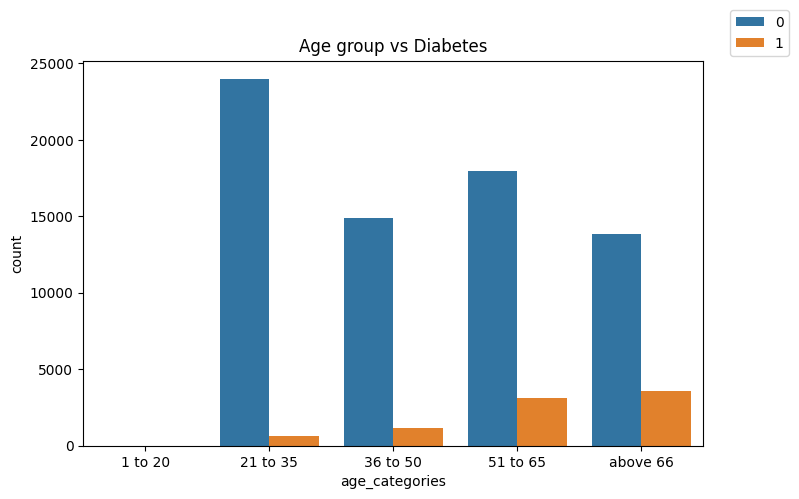

In [19]:
# the incidence of patients' developing diabetes increases with age
plt.figure(figsize=(8,5), dpi=100)
sns.countplot(data=df, x='age_categories', order=age_categories_order, hue='diabetes')
plt.legend(bbox_to_anchor=(1.15, 1.15))
plt.title('Age group vs Diabetes');

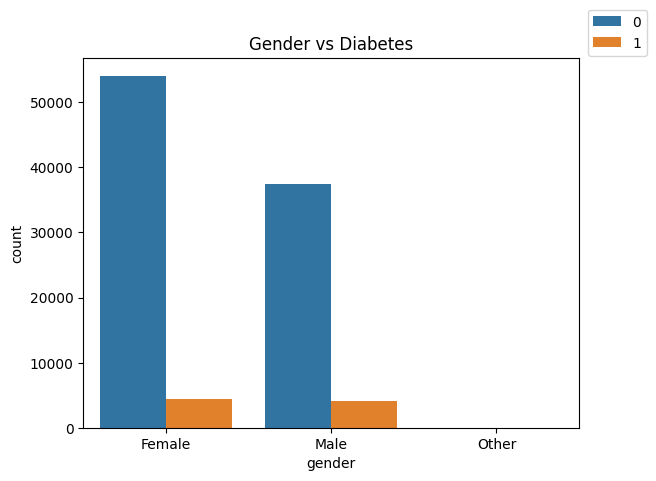

In [20]:
# Females are more likely to get diabetes compared to males
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Gender vs Diabetes')
plt.legend(bbox_to_anchor=(1.15,1.15));

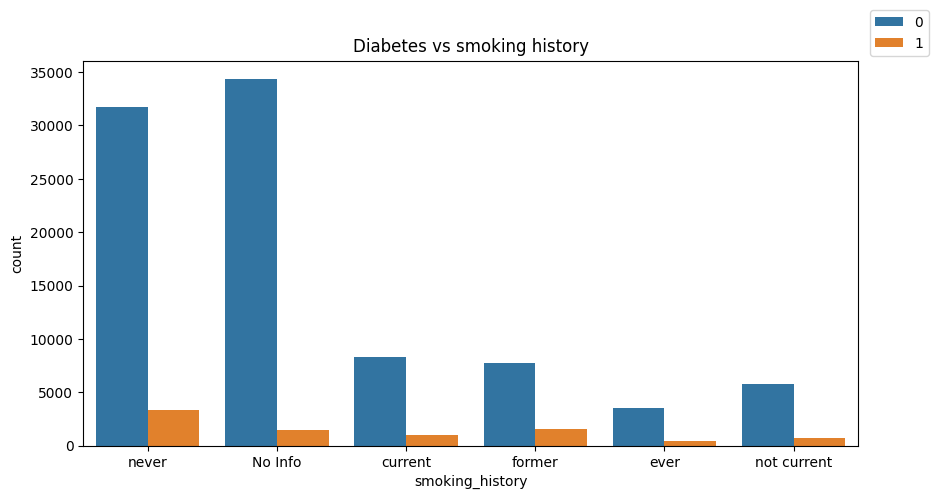

In [21]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x ='smoking_history', hue='diabetes')
plt.legend(bbox_to_anchor=(1.1,1.15))
plt.title('Diabetes vs smoking history');

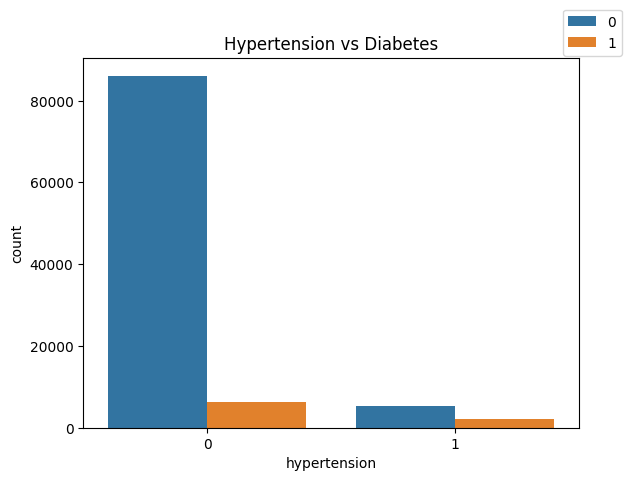

In [22]:
# Diabetic patients are likely non-hypertensive
sns.countplot(data=df, x='hypertension', hue='diabetes')
plt.title('Hypertension vs Diabetes')
plt.legend(bbox_to_anchor=(1.1, 1.15))

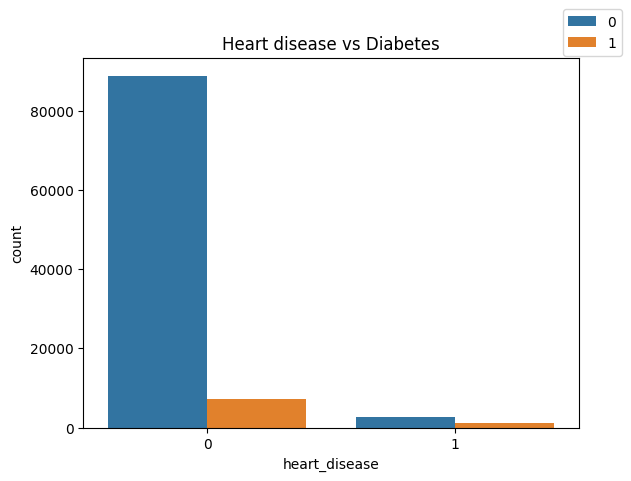

In [23]:
# Diabetic patients are not likely to suffer from heart disease
sns.countplot(data=df, x='heart_disease', hue='diabetes')
plt.title('Heart disease vs Diabetes')
plt.legend(bbox_to_anchor=(1.1, 1.15));

In [24]:
# to remove unimportant variables before machine learning algorithm
df = df.drop('age_categories', axis=1)

In [25]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [26]:
X = df.drop('diabetes', axis=1)

In [27]:
# to convert categorical variables in X into dummy variables before predictive modelling
X = pd.get_dummies(X, drop_first=True)

In [28]:
y = df['diabetes']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# testing data = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [32]:
scaler = StandardScaler()

In [33]:
scaled_X_train = scaler.fit_transform(X_train)

In [34]:
scaled_X_test = scaler.transform(X_test)

In [35]:
# to use oversampling via SMOTE as target variables 'diabetes' is highly imbalanced
from imblearn.over_sampling import SMOTE

In [36]:
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions y_train dataset:  (80000,)
Number transactions y_test dataset:  (20000,)


In [37]:
# to Oversample 'diabetes' in y_train set
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(scaled_X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 6834
Before OverSampling, counts of label '0': 73166 

After OverSampling, the shape of train_X: (146332, 13)
After OverSampling, the shape of train_y: (146332,) 

After OverSampling, counts of label '1': 73166
After OverSampling, counts of label '0': 73166


In [38]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [39]:
from xgboost import XGBClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
rf = RandomForestClassifier()

In [42]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [43]:
rf_pred = rf.predict(scaled_X_test)

In [44]:
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred)) # Random Forest classifier achieved accuracy rate = 96%

[[17958   376]
 [  449  1217]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18334
           1       0.76      0.73      0.75      1666

    accuracy                           0.96     20000
   macro avg       0.87      0.85      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [47]:
ada = AdaBoostClassifier()

In [48]:
ada.fit(X_train_res, y_train_res)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [49]:
ada_pred = ada.predict(scaled_X_test)

In [50]:
ada_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [51]:
print(confusion_matrix(y_test,ada_pred))
print('\n')
print(classification_report(y_test,ada_pred)) # AdaBoost classifier achieved an accuracy rate of 93%

[[17260  1074]
 [  285  1381]]


              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18334
           1       0.56      0.83      0.67      1666

    accuracy                           0.93     20000
   macro avg       0.77      0.89      0.82     20000
weighted avg       0.95      0.93      0.94     20000



In [52]:
gb = GradientBoostingClassifier()

In [53]:
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

In [54]:
gb_pred = gb.predict(scaled_X_test)

In [55]:
print(confusion_matrix(y_test,gb_pred))
print('\n')
print(classification_report(y_test,gb_pred)) # Gradient Boost classifier achieved accuracy rate = 96%

[[17802   532]
 [  376  1290]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18334
           1       0.71      0.77      0.74      1666

    accuracy                           0.95     20000
   macro avg       0.84      0.87      0.86     20000
weighted avg       0.96      0.95      0.96     20000



In [56]:
xg = XGBClassifier()

In [57]:
xg.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
xg_pred = xg.predict(scaled_X_test)

In [59]:
print(confusion_matrix(y_test,xg_pred))
print('\n')
print(classification_report(y_test,xg_pred)) # XGBoost classifier achieved accuracy rate = 97%

[[18212   122]
 [  510  1156]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18334
           1       0.90      0.69      0.79      1666

    accuracy                           0.97     20000
   macro avg       0.94      0.84      0.88     20000
weighted avg       0.97      0.97      0.97     20000



In [60]:
dt = DecisionTreeClassifier()

In [61]:
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [62]:
dt_pred = dt.predict(scaled_X_test)

In [63]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred)) # Decision Tree classifier achieved accuracy rate = 95%

[[17749   585]
 [  441  1225]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18334
           1       0.68      0.74      0.70      1666

    accuracy                           0.95     20000
   macro avg       0.83      0.85      0.84     20000
weighted avg       0.95      0.95      0.95     20000



In [65]:
# XGBoost classifier achieved the highest accuracy at 97%
xg.feature_importances_

array([0.06225759, 0.03670678, 0.02394163, 0.0226275 , 0.5165694 ,
       0.29001155, 0.00958652, 0.        , 0.0048899 , 0.00977544,
       0.00843002, 0.00935548, 0.00584826], dtype=float32)

In [66]:
pd.DataFrame(data=xg.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
HbA1c_level,0.516569
blood_glucose_level,0.290012
age,0.062258
hypertension,0.036707
heart_disease,0.023942
bmi,0.022627
smoking_history_ever,0.009775
gender_Male,0.009587
smoking_history_never,0.009355
smoking_history_former,0.008430


In [67]:
# to read into a new dataframe
xg_imp = pd.DataFrame(data=xg.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

C:\Users\miche\AppData\Local\Temp\ipykernel_14620\3616916964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xg_imp, y=xg_imp.index, x='Importance', palette='cubehelix')


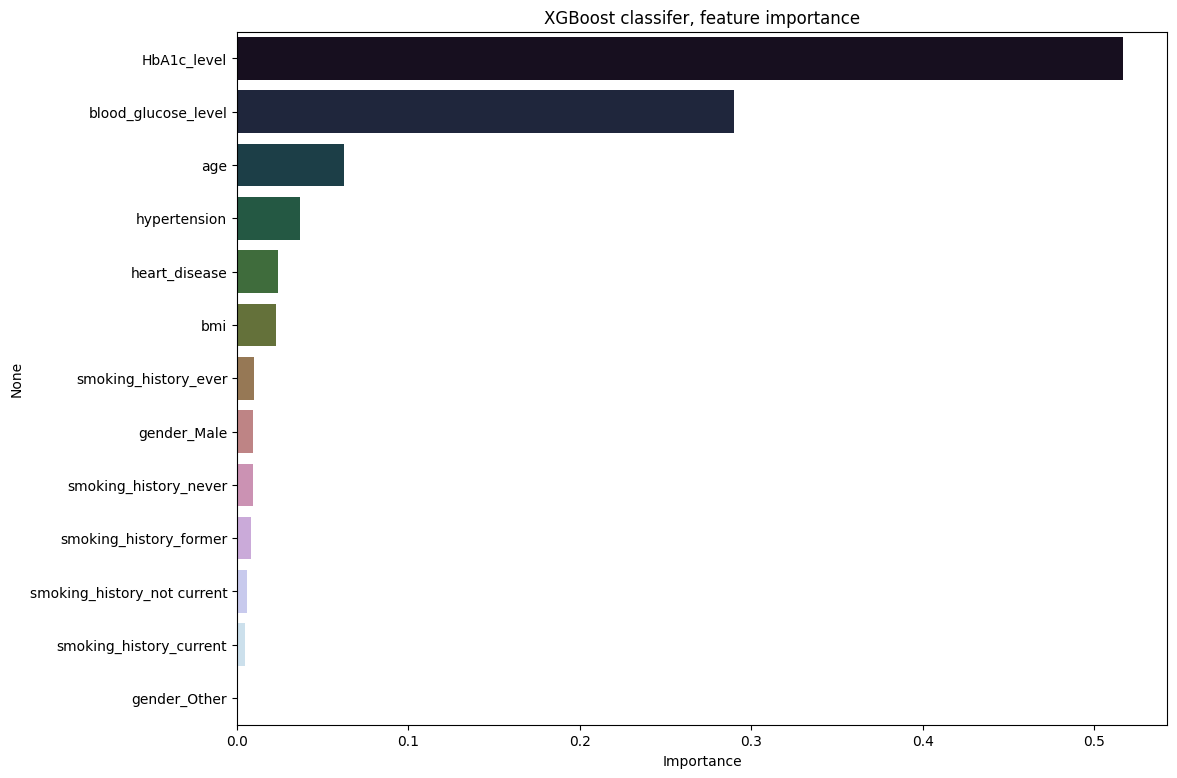

In [68]:
# to visualise predictors from XGBoost classifier in a barplot
# Predictors for patients developing diabetes: 'HbA1c level', 'blood glucose level','age'
plt.figure(figsize=(12,9), dpi=100)
sns.barplot(data=xg_imp, y=xg_imp.index, x='Importance', palette='cubehelix')
plt.title('XGBoost classifer, feature importance');